In [1]:
#importing the required packages
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#loading the given csv data
data = pd.read_csv('titanic_dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# PassengerId as Index Column

In [3]:
data = data.set_index('PassengerId')
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# Basic Details of Dataset

In [4]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
#finding the missing values
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# Filling the missing values

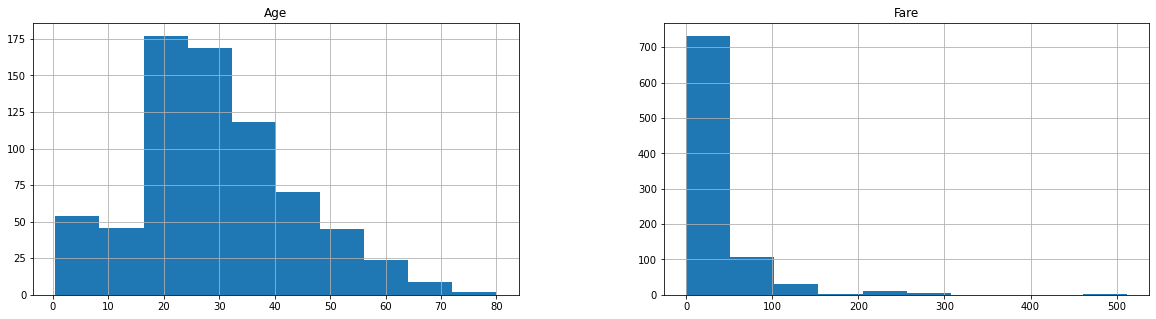

In [7]:
#Checking the variation
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,5))
plt.show()

Filling missing values for age

In [8]:
for i in ['Age']:
    data[i] = data[i].fillna(data[i].median())

In [9]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Filling missing values for cabin

In [10]:
#making all null values as "M" for Missing
cab_col = data['Cabin'].apply(lambda s:s[0] if pd.notnull(s) else 'M')

In [11]:
type(cab_col)

pandas.core.series.Series

In [12]:
#Changing to dataframe
cab_col = pd.DataFrame(cab_col)

In [13]:
type(cab_col)

pandas.core.frame.DataFrame

In [14]:
cab_col.isna().sum()

Cabin    0
dtype: int64

In [15]:
#dropping Cabin column
data.drop(['Cabin'],axis=1,inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
#concatenating cab_col with data
data = pd.concat([cab_col,data],axis=1)
data.head()

,Cabin,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,,
1,M,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,C,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,M,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,C,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,M,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
df = pd.DataFrame(data)
df

,Cabin,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,,
1,M,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,C,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,M,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,C,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,M,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
887,M,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,B,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,M,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


Filling missing values for Embarked

In [18]:
#checking null values
df.loc[df['Embarked'].isnull()]

,Cabin,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,,
62,B,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
830,B,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [19]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
df.loc[(df['Pclass'] == 1) & (df['Fare']<=80) & (df['Cabin'] == 'B')]['Embarked'].value_counts()

C    12
S    11
Name: Embarked, dtype: int64

In [21]:
#After cross-checking the value counts null value is assigned 'S'
df.loc[df['Embarked'].isnull(),'Embarked'] = 'S'

In [22]:
#checking null values
df.isna().sum()

Cabin       0
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# Handling outliers

In [23]:
#Managing Outliers for age
Q1 = np.percentile(data['Age'],25,interpolation='midpoint')
Q2 = np.percentile(data['Age'],50,interpolation='midpoint')
Q3 = np.percentile(data['Age'],75,interpolation='midpoint')

In [24]:
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [25]:
#Inter Quartile Range
IQR = Q3-Q1
IQR

13.0

In [26]:
#finding lower and upper limit
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print(low_lim)
print(up_lim)

2.5
54.5


In [27]:
outlier = []
for x in data ['Age']:
    if((x > up_lim) or (x < low_lim)):
        outlier.append(x)
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [28]:
#Managing Outliers for Fare
Q1 = np.percentile(data['Fare'],25,interpolation='midpoint')
Q2 = np.percentile(data['Fare'],50,interpolation='midpoint')
Q3 = np.percentile(data['Fare'],75,interpolation='midpoint')

In [29]:
print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


In [30]:
#Inter Quartile Range
IQR = Q3-Q1
IQR

23.0896

In [31]:
#finding lower and upper limit
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print(low_lim)
print(up_lim)

-26.724
65.6344


In [32]:
outlier = []
for x in data ['Age']:
    if((x > up_lim) or (x < low_lim)):
        outlier.append(x)
outlier

[66.0, 71.0, 70.5, 71.0, 80.0, 70.0, 70.0, 74.0]

# MinMax Scaling (Survived)

In [33]:
X = df

In [34]:
X.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
#assigning a column for family size
df['Family_Size'] = df['SibSp'] + df['Parch']

In [36]:
X.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.904602
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


In [37]:
#Dropping non required columns
X1 = X.drop(['SibSp','Parch','Name','Sex','Ticket','Cabin','Embarked'], axis=1)

In [38]:
X1.head()

,Survived,Pclass,Age,Fare,Family_Size
PassengerId,,,,,
1,0,3,22.0,7.2500,1
2,1,1,38.0,71.2833,1
3,1,3,26.0,7.9250,0
4,1,1,35.0,53.1000,1
5,0,3,35.0,8.0500,0


In [39]:
#applying minmax scaling
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0,1))
X1= min_max_scaler.fit_transform(X1)

In [40]:
type(X1)

numpy.ndarray

In [41]:
#converting to dataframe
X1 = pd.DataFrame(X1)

In [42]:
X1.columns=['Survived','Pclass','Age','Fare','Family_Size']
X1.describe()

,Survived,Pclass,Age,Fare,Family_Size
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.654321,0.363679,0.062858,0.090460
std,0.486592,0.418036,0.163605,0.096995,0.161346
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.271174,0.015440,0.000000
50%,0.000000,1.000000,0.346569,0.028213,0.000000
75%,1.000000,1.000000,0.434531,0.060508,0.100000
max,1.000000,1.000000,1.000000,1.000000,1.000000
